In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#https://meteostat.net/en/place/us/chicago?s=72534&t=2013-01-01/2022-01-01
import seaborn as sns

In [89]:
plt.style.use('bmh')

In [90]:
df = pd.read_stata('Stata/Divvy data by date.dta')
df = df.dropna()
df['Age'] = 2023- df['birthyear']
df

,start_date,usertype,gender,birthyear,trips,Age
1,2013-06-27,Subscriber,Female,1947.0,3.0,76.0
2,2013-06-27,Subscriber,Female,1968.0,1.0,55.0
3,2013-06-27,Subscriber,Female,1977.0,1.0,46.0
4,2013-06-27,Subscriber,Female,1980.0,5.0,43.0
5,2013-06-27,Subscriber,Female,1983.0,1.0,40.0
...,...,...,...,...,...,...
306742,2019-12-31,Subscriber,Male,1997.0,19.0,26.0
306743,2019-12-31,Subscriber,Male,1998.0,8.0,25.0
306744,2019-12-31,Subscriber,Male,1999.0,1.0,24.0
306745,2019-12-31,Subscriber,Male,2000.0,1.0,23.0


In [91]:
df['birthyear'].min()

1759.0

<AxesSubplot:xlabel='Age', ylabel='trips'>

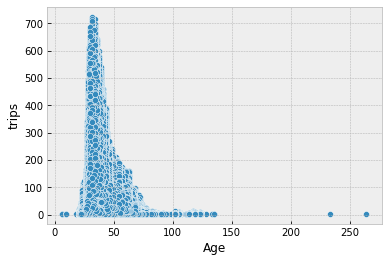

In [92]:
sns.scatterplot(data= df, x="Age", y="trips")

<AxesSubplot:xlabel='start_date', ylabel='trips'>

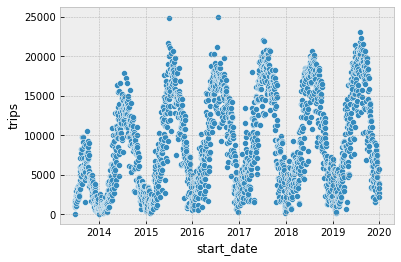

In [93]:
df1 = pd.read_stata('Stata/System-wide summary.dta')
sns.scatterplot(data=df1, x="start_date", y="trips")

In [94]:
weather = pd.read_csv('Stata/weather.csv')
weather.date = pd.to_datetime(weather.date)
df1['date'] = df1.start_date
type(df1.start_date[0])
merged = pd.merge(weather, df1, how="outer", on="date")

In [95]:
games = pd.read_csv('games.csv')
games.date = pd.to_datetime(games.date)
merged_g = pd.merge(merged,games, how="outer", on="date")
merged_g.Game = merged_g.Game.fillna(False)
gameday = merged_g[merged_g.Game.notna()]
notgameday = merged_g[merged_g.Game.isna()]

<AxesSubplot:xlabel='Game', ylabel='trips'>

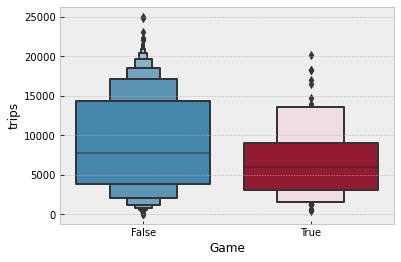

In [96]:

sns.boxenplot(data=merged_g, x="Game", y="trips")

In [97]:
notgameday

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,start_date,trips,Game


In [98]:

merged = merged[merged.start_date.notna()]
merged

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,start_date,trips
177,2013-06-27,25.3,18.9,32.8,2.3,0.0,NaN,10.2,NaN,1006.4,NaN,2013-06-27,95.0
178,2013-06-28,23.8,19.4,28.3,2.5,0.0,293.0,16.0,NaN,1003.1,NaN,2013-06-28,897.0
179,2013-06-29,19.5,17.8,22.2,0.0,NaN,3.0,19.0,NaN,1003.5,NaN,2013-06-29,1201.0
180,2013-06-30,20.7,17.2,24.4,0.0,0.0,8.0,22.7,NaN,1010.9,NaN,2013-06-30,1812.0
181,2013-07-01,20.5,15.6,23.9,0.0,0.0,21.0,21.9,NaN,1016.1,NaN,2013-07-01,1559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2019-12-27,1.9,-1.1,4.4,0.0,0.0,NaN,14.3,NaN,1024.1,NaN,2019-12-27,3981.0
2552,2019-12-28,4.2,-1.1,10.6,4.1,0.0,NaN,13.2,NaN,1020.0,NaN,2019-12-28,2768.0
2553,2019-12-29,12.8,8.9,14.4,21.6,0.0,185.0,19.1,NaN,1002.3,NaN,2019-12-29,3902.0
2554,2019-12-30,1.2,-2.2,8.9,2.0,0.0,248.0,30.6,NaN,NaN,NaN,2019-12-30,3308.0


<AxesSubplot:xlabel='tavg', ylabel='trips'>

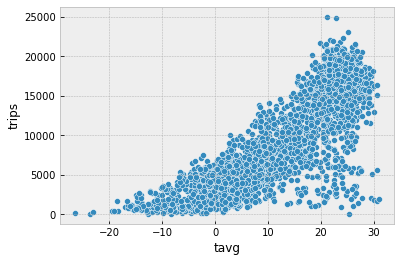

In [99]:
sns.scatterplot(data=merged, x="tavg", y="trips")

In [100]:
sns.scatterplot(data=merged, x="pre", y="trips")


ValueError: Could not interpret value `pre` for parameter `x`

<AxesSubplot:xlabel='prcp', ylabel='trips'>

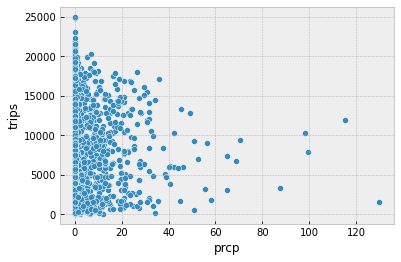

In [ ]:
sns.scatterplot(data=merged, x="prcp", y="trips")